In [1]:
#import statements
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer,RobustScaler,MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from statsmodels.formula.api import ols


import env
import get_function as gf

**Aquire**

In [2]:
# Import from zillow
df = gf.get_zillow_data()

In [3]:
df.head()

,parcelid,logerror,transactiondate,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,12177905,-0.103410,2017-01-01,2288172,12177905,NaN,None,None,3.0,4.0,...,NaN,None,108918.0,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13
1,12095076,-0.001011,2017-01-01,781532,12095076,1.0,None,None,3.0,4.0,...,NaN,None,276684.0,773303.0,2016.0,496619.0,9516.26,None,NaN,6.037461e+13
2,12069064,0.101723,2017-01-01,870991,12069064,NaN,None,None,1.0,2.0,...,NaN,None,18890.0,218552.0,2016.0,199662.0,2366.08,None,NaN,6.037302e+13
3,12790562,-0.040966,2017-01-02,1246926,12790562,NaN,None,None,3.0,4.0,...,NaN,None,177527.0,220583.0,2016.0,43056.0,3104.19,None,NaN,6.037500e+13
4,11104527,0.005963,2017-01-02,1639362,11104527,1.0,None,None,3.0,4.0,...,NaN,None,271715.0,430108.0,2016.0,158393.0,6103.36,None,NaN,6.037920e+13


In [4]:
df.shape

(33701, 62)

**Prepare**

In [5]:
# dropp columns with less than 60% of data non-null and rows with more than 75% of data non-null
df = gf.handle_missing_values(df, prop_required_column = .6, prop_required_row = .75)

In [6]:
df.isnull().sum()

parcelid                          0
logerror                          0
transactiondate                   0
id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
buildingqualitytypeid           127
calculatedbathnbr                 0
calculatedfinishedsquarefeet      0
finishedsquarefeet12              0
fips                              0
fullbathcnt                       0
heatingorsystemtypeid           536
latitude                          0
longitude                         0
lotsizesquarefeet               304
propertycountylandusecode         0
propertylandusetypeid             0
propertyzoningdesc               68
rawcensustractandblock            0
regionidcity                    694
regionidcounty                    0
regionidzip                      12
roomcnt                           0
unitcnt                           0
yearbuilt                         7
structuretaxvaluedollarcnt  

In [7]:
df.shape

(33701, 33)

In [8]:
# removing unnessesery columns
df = gf.remove_columns(df, ['roomcnt','assessmentyear','unitcnt','regionidzip','regionidcounty','propertylandusetypeid','propertycountylandusecode','fullbathcnt','calculatedbathnbr','rawcensustractandblock','finishedsquarefeet12','parcelid','transactiondate','id','regionidcity','buildingqualitytypeid','heatingorsystemtypeid','propertyzoningdesc','censustractandblock'])

In [9]:
df.isnull().sum()

logerror                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet      0
fips                              0
latitude                          0
longitude                         0
lotsizesquarefeet               304
yearbuilt                         7
structuretaxvaluedollarcnt       60
taxvaluedollarcnt                 0
landtaxvaluedollarcnt             0
taxamount                         4
dtype: int64

In [10]:
df.shape

(33701, 13)

In [11]:
df = df.rename(columns={'lotsizesquarefeet':'lot_square_feet','calculatedfinishedsquarefeet':'home_square_feet', 'logerror': 'target','bathroomcnt': 'bathroom', 'bedroomcnt': 'bedroom','structuretaxvaluedollarcnt':'structure_value','taxvaluedollarcnt': 'total_value','landtaxvaluedollarcnt':'land_value','taxamoun':'tax_amount','taxamount':'tax_amount','yearbuilt':'year_built'})

In [12]:
# Covert year built into age years

df['age']= 2017 - df.year_built

In [13]:
# Drop year built because we added age column

df.drop(columns='year_built',inplace=True)

In [14]:
# Delete rows where tax value amount does not equal land value + structure value

np.where(df.total_value - (df.land_value + df.structure_value) != 0)

(array([  397,   875,   878,   940,   959,  1203,  1278,  1324,  1726,
         1750,  1927,  2370,  4472,  4703,  5251,  5463,  5514,  5723,
         5783,  6108,  6887,  7005,  8739,  9386, 10622, 11406, 11585,
        12340, 12850, 13048, 13655, 13739, 14337, 14865, 15060, 18902,
        19494, 19762, 20312, 20614, 20917, 21217, 21285, 21661, 22036,
        22183, 22185, 23676, 25773, 26889, 27696, 28695, 31024, 31553,
        31708, 32148, 32171, 32679, 33018, 33032]),)

In [15]:
df.loc[31024]

# 397, 878,   940,   959,  1203,  1278,  1324,  1726,
# 1750,  1927,  2370,  4472,  4703,  5251,  5463,  5514,  5723,
# 5783,  6108,  6887,  7005,  8739,  9386, 10622, 11406, 11585,
# 12340, 12850, 13048, 13655, 13739, 14337, 14865, 15060, 18902,
# 19494, 19762, 20312, 20614, 20917, 21217, 21285, 21661, 22036,
# 22183, 22185, 23676, 25773, 26889, 27696, 28695, 31024, 31553,
# 31708, 32148, 32171, 32679, 33018, 33032]

target              8.249599e-02
bathroom            1.000000e+00
bedroom             3.000000e+00
home_square_feet    1.460000e+03
fips                6.037000e+03
latitude            3.411261e+07
longitude          -1.180782e+08
lot_square_feet     9.099000e+03
structure_value              NaN
total_value         7.898640e+05
land_value          7.898640e+05
tax_amount          9.132300e+03
age                 6.200000e+01
Name: 31024, dtype: float64

In [16]:
df.drop([397,   875,   878,   940,   959,  1203,  1278,  1324,  1726,
         1750,  1927,  2370,  4472,  4703,  5251,  5463,  5514,  5723,
         5783,  6108,  6887,  7005,  8739,  9386, 10622, 11406, 11585,
        12340, 12850, 13048, 13655, 13739, 14337, 14865, 15060, 18902,
        19494, 19762, 20312, 20614, 20917, 21217, 21285, 21661, 22036,
        22183, 22185, 23676, 25773, 26889, 27696, 28695, 31024, 31553,
        31708, 32148, 32171, 32679, 33018, 33032],axis=0,inplace=True)

In [17]:
df.isnull().sum()

target                0
bathroom              0
bedroom               0
home_square_feet      0
fips                  0
latitude              0
longitude             0
lot_square_feet     291
structure_value       0
total_value           0
land_value            0
tax_amount            3
age                   7
dtype: int64

In [18]:
# Split data (train & test)

train, test = gf.split_my_data(df, .80, 123)

In [19]:
# impute lot_square_feet,structure_value, and tax_amount for the mean

train = gf.imputer_9000(train,['lot_square_feet','tax_amount', 'age'],'mean')
test = gf.imputer_9000(test,['lot_square_feet','tax_amount', 'age'],'mean')

In [20]:
train['home_value_square_footage'] = train.structure_value/train.home_square_feet
train['land_value_square_footage'] = train.land_value/train.lot_square_feet

test['home_value_square_footage'] = test.structure_value/test.home_square_feet
test['land_value_square_footage'] = test.land_value/test.lot_square_feet

In [21]:
train.isnull().sum()

target                       0
bathroom                     0
bedroom                      0
home_square_feet             0
fips                         0
latitude                     0
longitude                    0
lot_square_feet              0
structure_value              0
total_value                  0
land_value                   0
tax_amount                   0
age                          0
home_value_square_footage    0
land_value_square_footage    0
dtype: int64

In [22]:
test.isnull().sum()

target                       0
bathroom                     0
bedroom                      0
home_square_feet             0
fips                         0
latitude                     0
longitude                    0
lot_square_feet              0
structure_value              0
total_value                  0
land_value                   0
tax_amount                   0
age                          0
home_value_square_footage    0
land_value_square_footage    0
dtype: int64

In [23]:
train.head()

,target,bathroom,bedroom,home_square_feet,fips,latitude,longitude,lot_square_feet,structure_value,total_value,land_value,tax_amount,age,home_value_square_footage,land_value_square_footage
33257,0.005565,3.0,4.0,1673.0,6037.0,33985663.0,-118229161.0,3000.0,126192.0,227194.0,101002.0,3505.67,18.0,75.428571,33.667333
8306,0.452906,1.0,3.0,950.0,6037.0,33941666.0,-118235240.0,3251.0,116496.0,191571.0,75075.0,2495.60,52.0,122.627368,23.092894
25859,0.020907,2.0,3.0,1256.0,6037.0,34209673.0,-118628052.0,7525.0,46269.0,84214.0,37945.0,1137.12,56.0,36.838376,5.042525
30676,0.012864,2.0,3.0,1984.0,6037.0,34129558.0,-117719482.0,15368.0,242729.0,683452.0,440723.0,9630.60,40.0,122.343246,28.677967
30916,0.007597,2.0,4.0,2016.0,6037.0,34013213.0,-117863106.0,7595.0,179535.0,223522.0,43987.0,2839.42,40.0,89.055060,5.791573


In [24]:
test.head()

,target,bathroom,bedroom,home_square_feet,fips,latitude,longitude,lot_square_feet,structure_value,total_value,land_value,tax_amount,age,home_value_square_footage,land_value_square_footage
33106,-0.027917,3.0,5.0,3083.0,6037.0,34671833.0,-118084245.0,11565.0,250104.0,309853.0,59749.0,4751.76,4.0,81.123581,5.166364
535,0.008490,1.0,3.0,1115.0,6037.0,33978427.0,-118063427.0,5697.0,96432.0,292670.0,196238.0,3732.85,67.0,86.486099,34.445849
6513,-0.034321,3.0,6.0,2176.0,6037.0,34032118.0,-118303539.0,7184.0,159154.0,424413.0,265259.0,5212.80,95.0,73.140625,36.923580
25153,-0.114455,2.0,2.0,1385.0,6037.0,34010163.0,-118309306.0,5876.0,29632.0,71701.0,42069.0,960.64,105.0,21.394946,7.159462
14729,0.070176,2.0,2.0,2209.0,6037.0,34043071.0,-118493656.0,9041.0,72049.0,228604.0,156555.0,3190.31,91.0,32.616116,17.316115


In [25]:
# Scaling dataframe in two ways

In [26]:
# Scale age, latitude, and longitude using MinMax scaler - why (to presrve distance better)

train = gf.scaler_min_max(train, ['age', 'latitude', 'longitude'])
test = gf.scaler_min_max(test, ['age', 'latitude', 'longitude'])

In [27]:
# Scale bathroom, bedroom, home_square_feet, lot_square_feet, structure_value, total_value, land_value, tax_amount using uniform scaler

# Scale columns using Uniform scaler (to smooth out the distribution and handle outliers)

train = gf.uniform_scaler(train,['bathroom', 'bedroom', 'home_square_feet', 'lot_square_feet', 'structure_value', 'total_value', 'land_value', 'tax_amount'])
test = gf.uniform_scaler(test,['bathroom', 'bedroom', 'home_square_feet', 'lot_square_feet', 'structure_value', 'total_value', 'land_value', 'tax_amount'])

In [28]:
train[train.target > 0].mean()

target                          0.081899
fips                         6037.004416
home_value_square_footage      90.518032
land_value_square_footage      40.968673
age                             0.418692
latitude                        0.526978
longitude                       0.524213
bathroom                        0.488470
bedroom                         0.515254
home_square_feet                0.518310
lot_square_feet                 0.506307
structure_value                 0.507789
total_value                     0.507428
land_value                      0.505919
tax_amount                      0.506962
dtype: float64

In [29]:
train[train.target < 0].mean()

target                         -0.068046
fips                         6037.003676
home_value_square_footage      90.428961
land_value_square_footage      39.519948
age                             0.433634
latitude                        0.530344
longitude                       0.528297
bathroom                        0.448830
bedroom                         0.481751
home_square_feet                0.477126
lot_square_feet                 0.491834
structure_value                 0.490066
total_value                     0.490615
land_value                      0.492507
tax_amount                      0.491223
dtype: float64

In [30]:
train.target.mean()

0.015217332551863352

In [31]:
train[train.target > 0].count()

target                       14944
fips                         14944
home_value_square_footage    14944
land_value_square_footage    14944
age                          14944
latitude                     14944
longitude                    14944
bathroom                     14944
bedroom                      14944
home_square_feet             14944
lot_square_feet              14944
structure_value              14944
total_value                  14944
land_value                   14944
tax_amount                   14944
dtype: int64

In [32]:
train[train.target < 0].count()

target                       11968
fips                         11968
home_value_square_footage    11968
land_value_square_footage    11968
age                          11968
latitude                     11968
longitude                    11968
bathroom                     11968
bedroom                      11968
home_square_feet             11968
lot_square_feet              11968
structure_value              11968
total_value                  11968
land_value                   11968
tax_amount                   11968
dtype: int64

In [33]:
train[train.target > 0].count() /(train[train.target > 0].count() + train[train.target < 0].count())

target                       0.555291
fips                         0.555291
home_value_square_footage    0.555291
land_value_square_footage    0.555291
age                          0.555291
latitude                     0.555291
longitude                    0.555291
bathroom                     0.555291
bedroom                      0.555291
home_square_feet             0.555291
lot_square_feet              0.555291
structure_value              0.555291
total_value                  0.555291
land_value                   0.555291
tax_amount                   0.555291
dtype: float64

Differinces in over and underestimation

over mean = .081

over %56

under mean = -.0680

under %44


In [34]:
stats.ttest_ind(train[train.target < 0].mean(),train[train.target > 0].mean())

Ttest_indResult(statistic=-0.00021801657840273504, pvalue=0.9998275938430903)

There is no significant differince in the overestimations and underestimations

In [35]:
train['absolute_target']= train.target.abs()

train[train.absolute_target < 0].count()

target                       0
fips                         0
home_value_square_footage    0
land_value_square_footage    0
age                          0
latitude                     0
longitude                    0
bathroom                     0
bedroom                      0
home_square_feet             0
lot_square_feet              0
structure_value              0
total_value                  0
land_value                   0
tax_amount                   0
absolute_target              0
dtype: int64

In [36]:
# plt.figure(figsize=(12,12))
# sns.heatmap(train.corr(), cmap='RdYlBu', annot=True, center=0)

In [37]:
# plt.figure(figsize=(22,22))
# sns.pairplot(train)
# plt.show()

In [38]:
# plt.figure(figsize=(22,22))
# sns.pairplot(train[['target', 'home_value_square_footage','land_value_square_footage']])
# plt.show()

home_value_square_footage and land_value_square_foortage show a correlation with logerror 

Going to try correlating home_value_square_footage and land_value_square_foortage  with longitude and latitude and see if a useful patrern emerges

   k           sse
0  1  1.065533e+08
1  2  5.687191e+07
2  3  3.234598e+07
3  4  2.060576e+07
4  5  1.331311e+07
5  6  9.439783e+06
6  7  7.102937e+06
7  8  5.409499e+06
8  9  4.393518e+06


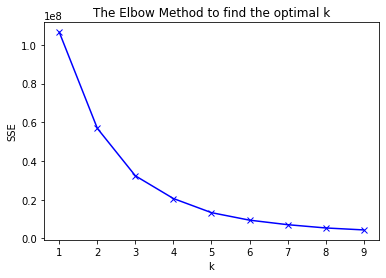

In [39]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['home_value_square_footage', 'longitude', 'latitude']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

We are going to look at models where k = 3, 4, or 5

[[ 58.02583499   0.54725506   0.52568753]
 [129.11691225   0.49842454   0.53627872]
 [362.36330027   0.38850164   0.47434598]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        16512.0  0.019341  0.171813 -4.655420 -0.029242  0.006748  0.043341   
1         9830.0  0.009099  0.158652 -1.738639 -0.028781  0.004939  0.038105   
2          570.0  0.001281  0.224293 -2.175696 -0.034279  0.017214  0.064267   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.100913  16512.0  6037.005329  ...   0.546021  0.991486   
1        5.262999   9830.0  6037.002238  ...   0.878041  0.993188   
2        2.069414    570.0  6037.000000  ...   0.990114  1.000000   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               16512.0  0.078970  0.153809  0.000003  0.015828  0.036554   
1                9830.0  0.068315  0.143478  0.000007  0.014974  0.034018   
2                 570.0  0.110170  0.195321  0.000013  0.024298  0.052839   

                             
              75%       max  
cluster                      
0        0.081906  4.655420  
1        0.071147  5.262999  
2        0.110816  2.175696  

[3 rows x 128 columns]

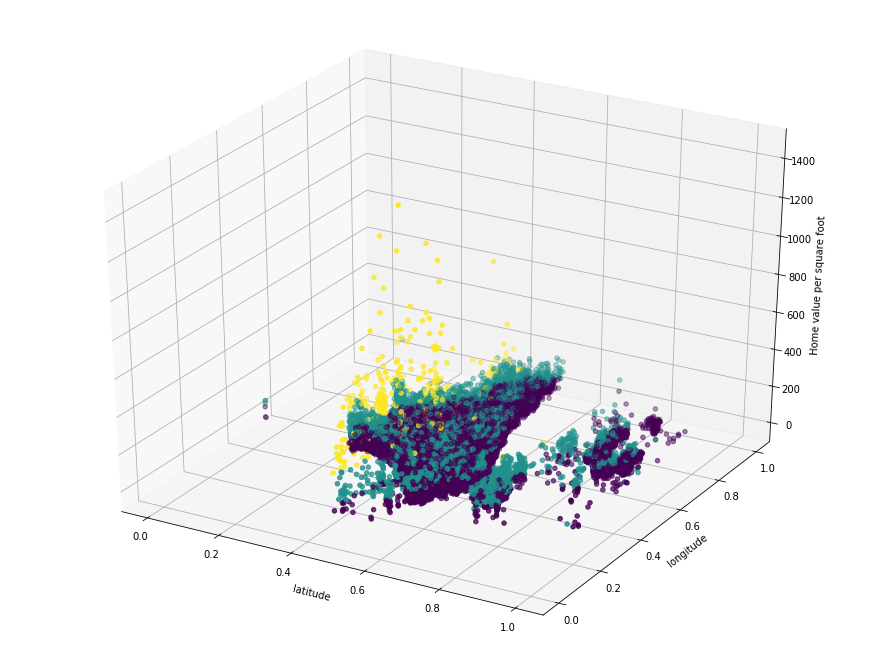

In [40]:
X = train[['home_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.home_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='Home value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[4.87641878e+01 5.45646494e-01 5.15217204e-01]
 [1.07287082e+02 5.21575437e-01 5.46895461e-01]
 [2.15031974e+02 4.41142201e-01 4.98261499e-01]
 [5.60082064e+02 3.58188810e-01 4.70609750e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        12346.0  0.021037  0.183127 -4.655420 -0.030413  0.007576  0.046490   
1        12496.0  0.011741  0.151620 -1.738639 -0.026920  0.004773  0.036746   
2         1928.0  0.002292  0.152705 -1.702338 -0.036763  0.007658  0.050910   
3          142.0 -0.009320  0.347572 -2.175696 -0.052218  0.021616  0.072871   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.100913  12346.0  6037.003564  ...   0.454155  0.991486   
1        5.262999  12496.0  6037.003521  ...   0.807525  0.993188   
2        1.457856   1928.0  6037.011411  ...   0.971969  0.997639   
3        2.069414    142.0  6037.000000  ...   0.991118  1.000000   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               12346.0  0.084634  0.163751  0.000003  0.016832  0.038465   
1               12496.0  0.064818  0.137567  0.000006  0.013958  0.032324   
2                1928.0  0.083145  0.128091  0.000007  0.019407  0.044005   
3                 142.0  0.162806  0.306921  0.000429  0.033564  0.065141   

                             
              75%       max  
cluster                      
0        0.087642  4.655420  
1        0.067655  5.262999  
2        0.095031  1.702338  
3        0.145386  2.175696  

[4 rows x 128 columns]

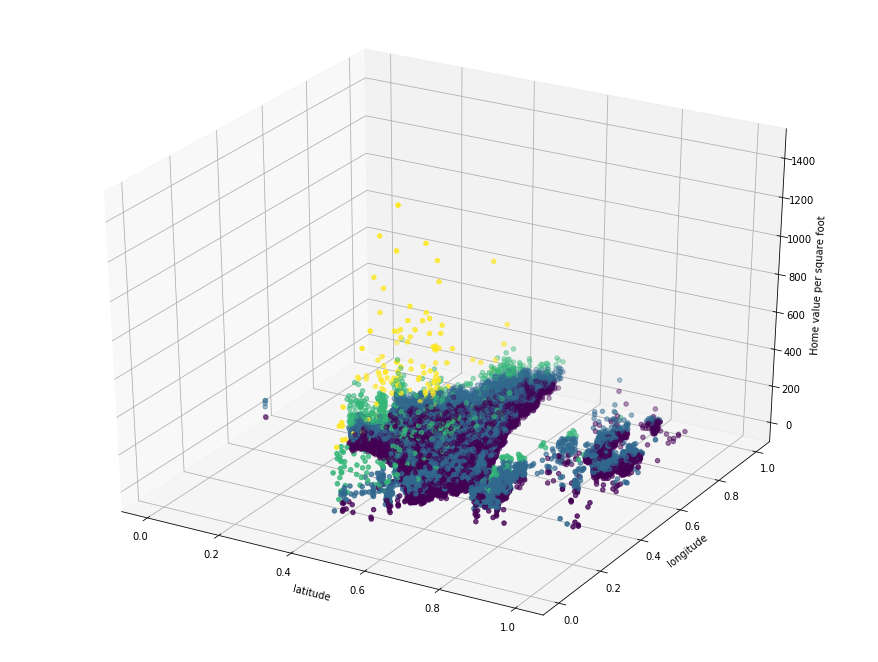

In [41]:
X = train[['home_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.home_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='Home value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[9.12869349e+01 5.41111190e-01 5.48669973e-01]
 [1.53966612e+02 4.72515807e-01 5.26061167e-01]
 [7.40214451e+02 3.64830524e-01 4.78387842e-01]
 [4.12404609e+01 5.40637026e-01 5.06458791e-01]
 [3.05808382e+02 3.98096088e-01 4.77309442e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        12464.0  0.013972  0.144739 -1.623253 -0.026280  0.005234  0.036923   
1         4395.0  0.005569  0.164981 -1.738639 -0.030785  0.005593  0.041463   
2           56.0 -0.060786  0.231311 -1.019561 -0.056040  0.015172  0.047437   
3         9371.0  0.022579  0.192963 -4.655420 -0.032441  0.007553  0.048610   
4          626.0  0.004347  0.220266 -2.175696 -0.035723  0.016276  0.064828   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.394544  12464.0  6037.003530  ...   0.732327  0.993188   
1        5.262999   4395.0  6037.005006  ...   0.925927  0.992252   
2        0.244792     56.0  6037.000000  ...   0.991389  0.999529   
3        3.100913   9371.0  6037.004695  ...   0.355614  0.991486   
4        2.069414    626.0  6037.000000  ...   0.989713  1.000000   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               12464.0  0.064607  0.130270  0.000006  0.014096  0.032161   
1                4395.0  0.072443  0.148326  0.000007  0.015785  0.036827   
2                  56.0  0.131206  0.199346  0.000429  0.030359  0.052918   
3                9371.0  0.089719  0.172320  0.000003  0.017500  0.040816   
4                 626.0  0.106263  0.192940  0.000011  0.024298  0.052566   

                             
              75%       max  
cluster                      
0        0.067877  3.394544  
1        0.076961  5.262999  
2        0.134748  1.019561  
3        0.092471  4.655420  
4        0.106986  2.175696  

[5 rows x 128 columns]

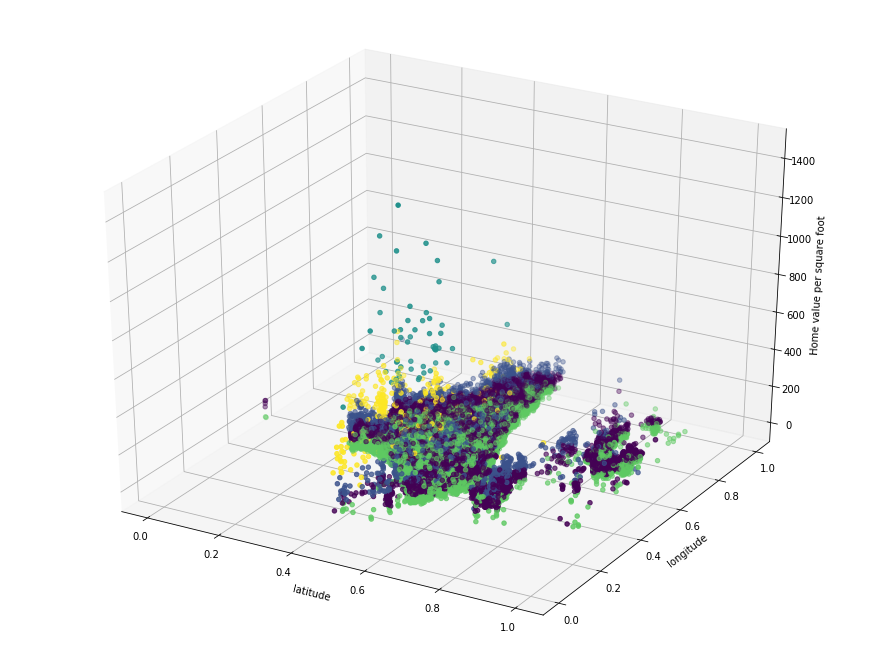

In [42]:
X = train[['home_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.home_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='Home value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

   k           sse
0  1  1.090859e+08
1  2  5.551515e+07
2  3  3.222102e+07
3  4  1.906374e+07
4  5  1.274851e+07
5  6  8.904924e+06
6  7  6.585741e+06
7  8  4.888764e+06
8  9  3.820771e+06


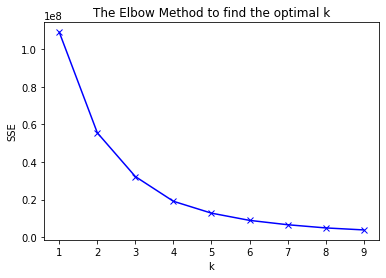

In [43]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['land_value_square_footage', 'longitude', 'latitude']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

[[2.67646580e+01 5.35409520e-01 5.35737464e-01]
 [1.57199649e+02 4.32859156e-01 4.56781360e-01]
 [7.08633525e+02 3.78081018e-01 4.02525981e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        24499.0  0.016376  0.161548 -2.331727 -0.028718  0.005928  0.041255   
1         2322.0  0.002905  0.228037 -4.655420 -0.036267  0.010690  0.049514   
2           91.0  0.017586  0.204390 -0.696273 -0.042295  0.014794  0.066097   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.394544  24499.0  6037.002694  ...   0.688510  0.994397   
1        5.262999   2322.0  6037.009475  ...   0.964324  0.999529   
2        1.310249     91.0  6037.241758  ...   0.990383  1.000000   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               24499.0  0.074488  0.144282  0.000003  0.015203  0.035053   
1                2322.0  0.087731  0.210498  0.000007  0.019937  0.043601   
2                  91.0  0.106588  0.174930  0.000161  0.025714  0.063555   

                             
              75%       max  
cluster                      
0        0.077300  3.394544  
1        0.088114  5.262999  
2        0.110133  1.310249  

[3 rows x 128 columns]

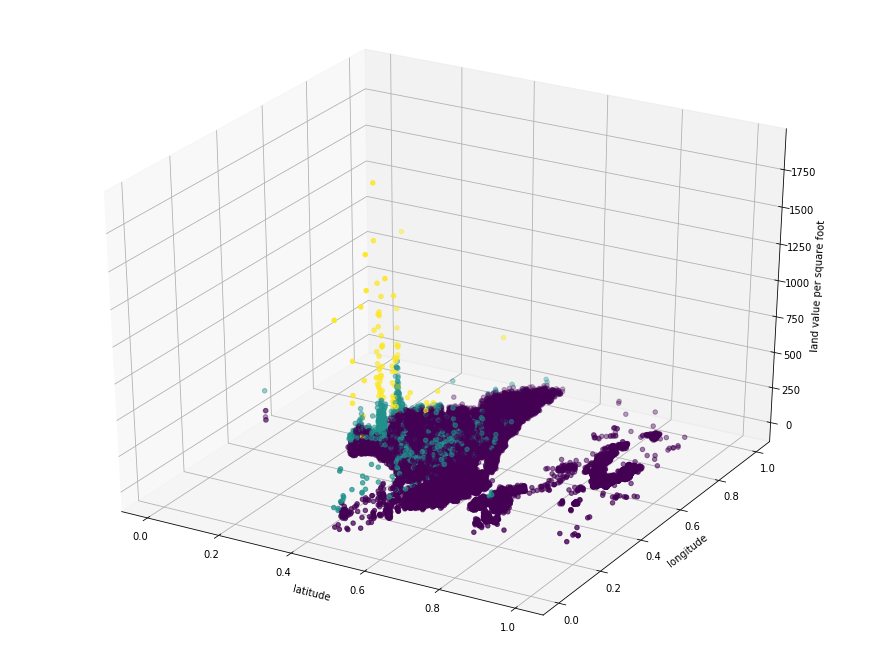

In [44]:
X = train[['land_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.land_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='land value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[7.84142135e+01 4.91023480e-01 4.67081429e-01]
 [2.53045774e+02 4.05291696e-01 4.47605732e-01]
 [9.01535908e+02 3.44311632e-01 3.99222303e-01]
 [1.77208840e+01 5.42385435e-01 5.51557701e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         6291.0  0.006509  0.173173 -4.655420 -0.030339  0.005890  0.040987   
1          775.0  0.003764  0.249196 -2.175696 -0.031901  0.014583  0.054894   
2           48.0  0.021690  0.155048 -0.430161 -0.046968  0.018875  0.072510   
3        19798.0  0.018417  0.162936 -2.271428 -0.028847  0.006057  0.041717   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.175688   6291.0  6037.003497  ...   0.889125  0.997408   
1        5.262999    775.0  6037.000000  ...   0.982474  0.999529   
2        0.664921     48.0  6037.458333  ...   0.991219  1.000000   
3        3.394544  19798.0  6037.003334  ...   0.583285  0.994397   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0                6291.0  0.073280  0.157037  0.000007  0.016012  0.036324   
1                 775.0  0.090268  0.232280  0.000034  0.021621  0.045990   
2                  48.0  0.099630  0.119929  0.006578  0.034340  0.067854   
3               19798.0  0.075893  0.145352  0.000003  0.015280  0.035277   

                             
              75%       max  
cluster                      
0        0.074840  4.655420  
1        0.089664  5.262999  
2        0.118952  0.664921  
3        0.078777  3.394544  

[4 rows x 128 columns]

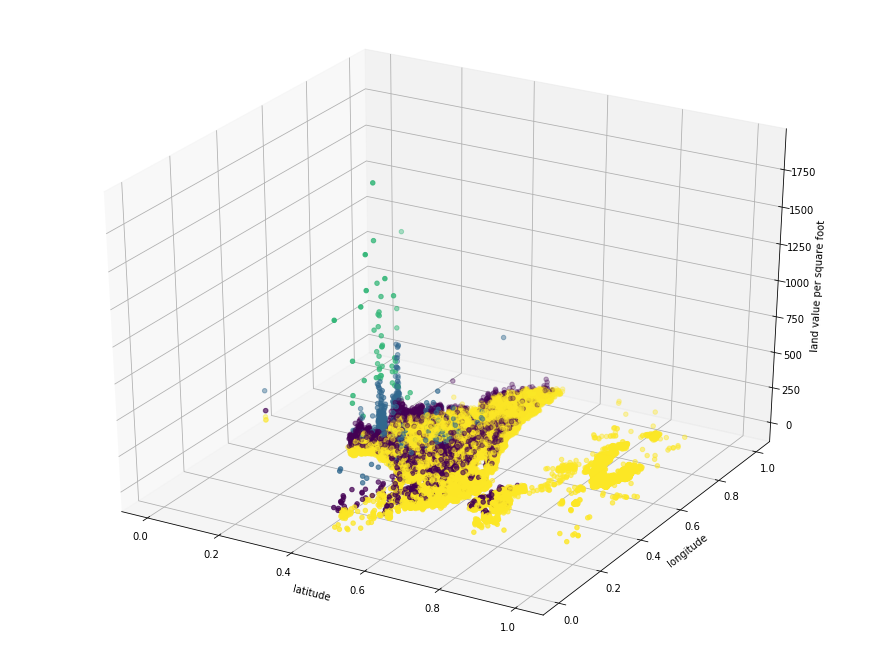

In [45]:
X = train[['land_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.land_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='land value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[5.87278623e+01 5.10216219e-01 4.76476292e-01]
 [3.54860515e+02 3.91724610e-01 4.29130325e-01]
 [1.52994442e+02 4.25945138e-01 4.60288897e-01]
 [1.02734110e+03 3.30690528e-01 3.99768232e-01]
 [1.36067790e+01 5.45574863e-01 5.61868092e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         8151.0  0.010653  0.151224 -2.331727 -0.027291  0.005931  0.039577   
1          301.0  0.004209  0.212650 -2.175696 -0.025997  0.020871  0.064884   
2         1537.0  0.002346  0.255719 -4.655420 -0.042345  0.008874  0.049075   
3           33.0  0.008200  0.097141 -0.205920 -0.044590  0.019148  0.063555   
4        16890.0  0.018801  0.165539 -2.271428 -0.029269  0.006010  0.042112   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.175688   8151.0  6037.005398  ...   0.830019  0.993300   
1        1.310249    301.0  6037.000000  ...   0.988887  0.999529   
2        5.262999   1537.0  6037.014314  ...   0.964161  0.997408   
3        0.273869     33.0  6037.666667  ...   0.991407  1.000000   
4        3.394544  16890.0  6037.001303  ...   0.520219  0.994397   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0                8151.0  0.068708  0.135133  0.000007  0.014978  0.033675   
1                 301.0  0.097585  0.188900  0.000045  0.023736  0.049176   
2                1537.0  0.092957  0.238224  0.000034  0.021495  0.045945   
3                  33.0  0.073982  0.062140  0.006578  0.024019  0.060729   
4               16890.0  0.077179  0.147648  0.000003  0.015412  0.035714   

                             
              75%       max  
cluster                      
0        0.071032  3.175688  
1        0.093285  2.175696  
2        0.092322  5.262999  
3        0.088338  0.273869  
4        0.080478  3.394544  

[5 rows x 128 columns]

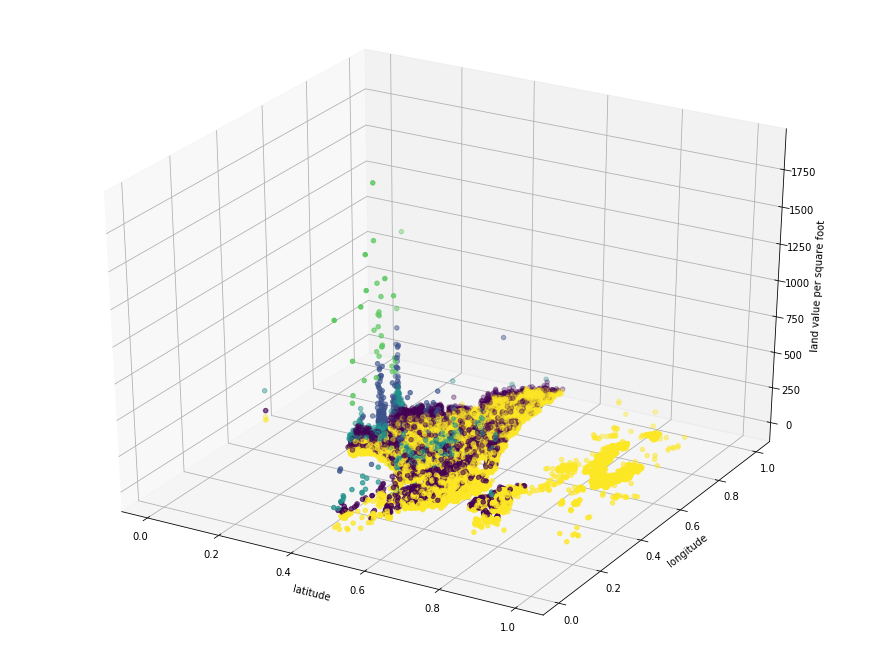

In [46]:
X = train[['land_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.land_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='land value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

In [47]:
X = train[['land_value_square_footage', 'longitude', 'latitude','home_value_square_footage']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[1.60694030e+01 5.53306690e-01 5.39803307e-01 5.27424226e+01]
 [1.70545669e+02 4.21395088e-01 4.61926855e-01 1.94939989e+02]
 [4.45729189e+01 5.11267238e-01 5.25733932e-01 1.13729696e+02]
 [8.42879633e+02 3.71535323e-01 3.90696381e-01 2.77097443e+02]
 [2.18737700e+02 3.62559693e-01 4.74384460e-01 5.40619558e+02]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        13592.0  0.021317  0.173258 -2.271428 -0.030194  0.006821  0.045270   
1         1598.0  0.005337  0.210282 -0.976064 -0.037508  0.008497  0.050643   
2        11516.0  0.009748  0.151708 -4.655420 -0.026817  0.005076  0.036536   
3           57.0  0.014240  0.157799 -0.430161 -0.054102  0.018603  0.074126   
4          149.0 -0.012127  0.349278 -2.175696 -0.052796  0.022360  0.076803   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.100913  13592.0  6037.004856  ...   0.434061  0.990766   
1        5.262999   1598.0  6037.000000  ...   0.973083  0.997639   
2        3.394544  11516.0  6037.001910  ...   0.823675  0.991486   
3        0.664921     57.0  6037.385965  ...   0.991075  1.000000   
4        2.069414    149.0  6037.000000  ...   0.990795  0.999529   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               13592.0  0.082292  0.153949  0.000003  0.016286  0.037815   
1                1598.0  0.087329  0.191352  0.000007  0.020803  0.045852   
2               11516.0  0.065061  0.137394  0.000011  0.014257  0.032275   
3                  57.0  0.103462  0.119212  0.003005  0.034994  0.071972   
4                 149.0  0.168324  0.305972  0.000429  0.037351  0.065904   

                             
              75%       max  
cluster                      
0        0.085281  3.100913  
1        0.091927  5.262999  
2        0.068310  4.655420  
3        0.125925  0.664921  
4        0.147296  2.175696  

[5 rows x 128 columns]

In [48]:
X = train[['land_value_square_footage', 'longitude', 'latitude','home_value_square_footage']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[1.72480675e+02 4.19466000e-01 4.61490938e-01 1.95503430e+02]
 [1.63330724e+01 5.53208276e-01 5.39924544e-01 5.34284490e+01]
 [4.51714679e+01 5.10240786e-01 5.25061877e-01 1.14707681e+02]
 [8.42879633e+02 3.71535323e-01 3.90696381e-01 2.77097443e+02]
 [2.18098139e+02 3.62138724e-01 4.74124785e-01 5.41887206e+02]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         1564.0  0.005710  0.211372 -0.976064 -0.037386  0.008372  0.050710   
1        13865.0  0.021227  0.175528 -2.331727 -0.030014  0.006809  0.045240   
2        11278.0  0.009519  0.147888 -4.655420 -0.027187  0.005041  0.036502   
3           57.0  0.014240  0.157799 -0.430161 -0.054102  0.018603  0.074126   
4          148.0 -0.012690  0.350396 -2.175696 -0.053812  0.021616  0.077476   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        5.262999   1564.0  6037.000000  ...   0.973413  0.997639   
1        3.394544  13865.0  6037.004760  ...   0.440037  0.990766   
2        3.175688  11278.0  6037.001951  ...   0.827303  0.991486   
3        0.664921     57.0  6037.385965  ...   0.991075  1.000000   
4        2.069414    148.0  6037.000000  ...   0.990805  0.999529   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0                1564.0  0.087219  0.192611  0.000007  0.020781  0.045852   
1               13865.0  0.082168  0.156552  0.000003  0.016156  0.037670   
2               11278.0  0.064879  0.133235  0.000011  0.014321  0.032424   
3                  57.0  0.103462  0.119212  0.003005  0.034994  0.071972   
4                 148.0  0.168980  0.306906  0.000429  0.036797  0.065857   

                             
              75%       max  
cluster                      
0        0.091616  5.262999  
1        0.085045  3.394544  
2        0.068213  4.655420  
3        0.125925  0.664921  
4        0.150298  2.175696  

[5 rows x 128 columns]

In [49]:
X = train

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[2.08517910e-02 6.03700449e+03 5.54219364e+01 1.67565818e+01
  4.40169950e-01 5.42163039e-01 5.53386400e-01 4.13995700e-01
  4.79277602e-01 4.53479656e-01 4.98820739e-01 3.28897862e-01
  3.11382596e-01 3.30120881e-01 3.14850357e-01 8.11253997e-02
  1.05681818e+00]
 [3.11547896e-03 6.03700000e+03 2.44301508e+02 1.80992575e+02
  4.25201349e-01 4.63621611e-01 4.08527770e-01 6.66214293e-01
  5.66735589e-01 6.91887627e-01 4.70595044e-01 8.93232514e-01
  9.42234073e-01 9.39693515e-01 9.37598438e-01 9.64713979e-02
  4.04852161e-01]
 [9.01081847e-03 6.03700203e+03 1.17400528e+02 4.97828367e+01
  4.05993553e-01 5.18771441e-01 5.04384874e-01 5.22114855e-01
  5.20575658e-01 5.37960748e-01 5.07676342e-01 6.81027640e-01
  6.98558818e-01 6.73377935e-01 6.94455737e-01 6.56066466e-02
  1.93099621e+00]
 [1.82053225e-02 6.03725581e+03 3.37484979e+02 7.21214102e+02
  3.24233232e-01 4.03782983e-01 3.74216538e-01 7.42843720e-01
  5.42165844e-01 7.33040450e-01 1.47157098e-01 9.21651472e-01
  9.73047253e-01

target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        14678.0  0.020859  0.173583 -2.331727 -0.029999  0.006655  0.044561   
1         1319.0  0.003115  0.235094 -2.175696 -0.036196  0.010919  0.054273   
2        10829.0  0.009021  0.150197 -4.655420 -0.027501  0.005237  0.037134   
3           86.0  0.018205  0.210301 -0.696273 -0.044885  0.013181  0.070227   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.394544  14678.0  6037.004497  ...   0.459156  0.990766   
1        5.262999   1319.0  6037.000000  ...   0.981993  0.999529   
2        3.175688  10829.0  6037.002032  ...   0.844426  0.991486   
3        1.310249     86.0  6037.255814  ...   0.990412  1.000000   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               14678.0  0.081164  0.154849  0.000003  0.015998  0.037294   
1                1319.0  0.096471  0.214395  0.000007  0.021617  0.047063   
2               10829.0  0.065580  0.135423  0.000011  0.014564  0.032882   
3                  86.0  0.110979  0.179166  0.000161  0.024154  0.064762   

                             
              75%       max  
cluster                      
0        0.084456  3.394544  
1        0.098133  5.262999  
2        0.068961  4.655420  
3        0.115746  1.310249  

[4 rows x 128 columns]

   k           sse
0  1  2.156857e+08
1  2  1.328786e+08
2  3  9.909432e+07
3  4  7.820197e+07
4  5  6.369068e+07
5  6  5.352213e+07
6  7  4.567018e+07
7  8  3.895428e+07
8  9  3.373815e+07


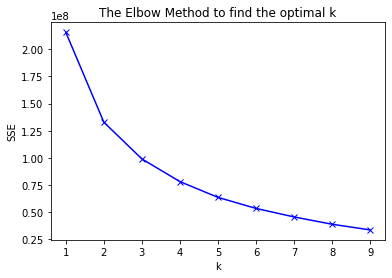

In [50]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [51]:
X = train

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[ 2.13104453e-02  6.03700479e+03  5.32150976e+01  1.62285085e+01
   4.44097764e-01  5.40004696e-01  5.53209198e-01  4.08870785e-01
   4.76426018e-01  4.50059298e-01  4.95704908e-01  3.13146968e-01
   2.98438414e-01  3.20136346e-01  3.01757845e-01  8.23138916e-02
   4.35224141e-04]
 [ 9.47509941e-03  6.03700194e+03  1.14349559e+02  4.49619828e+01
   4.00830770e-01  5.25166408e-01  5.10638493e-01  5.19359951e-01
   5.22183653e-01  5.34525184e-01  5.16081635e-01  6.69426183e-01
   6.76962220e-01  6.50262564e-01  6.73848561e-01  6.47996660e-02
   1.84162257e+00]
 [ 5.88016803e-03  6.03700000e+03  1.95101946e+02  1.71505971e+02
   4.44867914e-01  4.61685772e-01  4.20329586e-01  6.30353718e-01
   5.39255210e-01  6.56562941e-01  4.21800174e-01  8.51711769e-01
   9.25524993e-01  9.29414476e-01  9.19746368e-01  8.71500788e-02
   1.25886076e+00]
 [ 1.42397474e-02  6.03738596e+03  2.77097443e+02  8.42879633e+02
   2.93668955e-01  3.90696381e-01  3.71535323e-01  8.04827726e-01
   5.94364700e-01  

target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        13778.0  0.021293  0.175904 -2.331727 -0.030110  0.006811  0.045235   
1        11345.0  0.009492  0.147633 -4.655420 -0.027155  0.005037  0.036440   
2         1583.0  0.005981  0.210454 -0.976064 -0.037358  0.008614  0.050926   
3           57.0  0.014240  0.157799 -0.430161 -0.054102  0.018603  0.074126   
4          149.0 -0.012127  0.349278 -2.175696 -0.052796  0.022360  0.076803   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.394544  13778.0  6037.004790  ...   0.437842  0.990766   
1        3.175688  11345.0  6037.001939  ...   0.825721  0.991486   
2        5.262999   1583.0  6037.000000  ...   0.973100  0.997639   
3        0.664921     57.0  6037.385965  ...   0.991075  1.000000   
4        2.069414    149.0  6037.000000  ...   0.990795  0.999529   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               13778.0  0.082301  0.156913  0.000003  0.016201  0.037716   
1               11345.0  0.064829  0.132975  0.000011  0.014288  0.032347   
2                1583.0  0.087097  0.191666  0.000007  0.020774  0.045932   
3                  57.0  0.103462  0.119212  0.003005  0.034994  0.071972   
4                 149.0  0.168324  0.305972  0.000429  0.037351  0.065904   

                             
              75%       max  
cluster                      
0        0.085064  3.394544  
1        0.068247  4.655420  
2        0.091622  5.262999  
3        0.125925  0.664921  
4        0.147296  2.175696  

[5 rows x 128 columns]

In [52]:
X = train

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[ 2.33356296e-02  6.03700231e+03  4.27013212e+01  1.17339609e+01
   4.63529756e-01  5.27157798e-01  5.49452130e-01  3.83506200e-01
   4.61323803e-01  4.34143894e-01  4.86342786e-01  2.35457791e-01
   2.20295753e-01  2.51413101e-01  2.24137737e-01  8.89796299e-02
   1.31561428e-13]
 [ 8.02047370e-03  6.03700000e+03  1.89982997e+02  2.30915402e+02
   4.40657350e-01  4.49819957e-01  4.10831534e-01  6.51439566e-01
   5.46113516e-01  6.69991417e-01  3.29659541e-01  8.45941007e-01
   9.35073743e-01  9.45265004e-01  9.30302919e-01  8.69260206e-02
   2.02142857e+00]
 [ 2.05588144e-02  6.03746809e+03  2.91905417e+02  9.07539243e+02
   3.04347826e-01  3.97788410e-01  3.48436959e-01  8.08096159e-01
   6.03374167e-01  8.01814929e-01  1.53450484e-01  9.40113120e-01
   9.80588775e-01  9.83363403e-01  9.78554690e-01  1.00157431e-01
   3.00000000e+00]
 [ 1.32589480e-02  6.03700512e+03  9.36267164e+01  3.61163831e+01
   4.02024620e-01  5.41428876e-01  5.33667810e-01  4.86965305e-01
   5.14174948e-01  

target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         9528.0  0.023334  0.184621 -2.271428 -0.032083  0.007862  0.049265   
1          840.0  0.008020  0.228864 -0.860147 -0.034724  0.013346  0.054631   
2           47.0  0.020559  0.156524 -0.430161 -0.049346  0.018603  0.068481   
3        12889.0  0.013251  0.149895 -4.655420 -0.025975  0.004906  0.036002   
4          154.0 -0.010415  0.343415 -2.175696 -0.052218  0.021616  0.073917   
5         3454.0  0.002985  0.157287 -1.738639 -0.034102  0.005595  0.043641   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.100913   9528.0  6037.002309  ...   0.316906  0.973109   
1        5.262999    840.0  6037.000000  ...   0.977474  0.997639   
2        0.664921     47.0  6037.468085  ...   0.991281  1.000000   
3        3.394544  12889.0  6037.005121  ...   0.736831  0.991486   
4        2.069414    154.0  6037.000000  ...   0.990768  0.999529   
5        2.591723   3454.0  6037.000000  ...   0.931832  0.993276   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0                9528.0  0.088983  0.163434  0.000003  0.017549  0.040913   
1                 840.0  0.086926  0.211844  0.000034  0.022389  0.045502   
2                  47.0  0.100157  0.121169  0.006578  0.033686  0.064991   
3               12889.0  0.063996  0.136192  0.000006  0.013762  0.031543   
4                 154.0  0.163299  0.301997  0.000429  0.034353  0.065532   
5                3454.0  0.076065  0.137697  0.000007  0.016636  0.038853   

                             
              75%       max  
cluster                      
0        0.093371  3.100913  
1        0.089418  5.262999  
2        0.121277  0.664921  
3        0.066103  4.655420  
4        0.145386  2.175696  
5        0.081898  2.591723  

[6 rows x 128 columns]

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt

def regression_errors(y, yhat, data_frame):
    # SSE - sum of squared errors using MSE * len()
    SSE = mean_squared_error(y, X_train.yhat) * len(X_train)
    # MSE - mean of squared errors
    MSE = mean_squared_error(y, X_train.yhat)
    # ESS - explained sum of squares
    ESS = sum((X_train.yhat - train.target.mean()) ** 2)
    # TSS - total sum of squares
    TSS = SSE + ESS
    # RMSE - root mean squared error
    RMSE = sqrt(MSE)
    print("SSE: ", SSE, "EES: ", ESS, "TSS: ", TSS, "MSE: ", MSE, "RMSE: ", RMSE)
    return SSE, ESS, TSS, MSE, RMSE

In [54]:
# Create linear model
X_train = pd.DataFrame(train.drop(columns='target'))
y_train = pd.DataFrame(train.target)

In [55]:
# Baseline Everything
x = pd.DataFrame(train.drop(columns=['target','absolute_target']))
y = pd.DataFrame(train.target)

regr = ols('y ~ x', data = train).fit()

X_train['yhat'] = regr.predict(x)

#regr.summary()

In [56]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  761.10552686765 EES:  3.0774891606438253 TSS:  764.1830160282939 MSE:  0.02828126957742457 RMSE:  0.16817035879555164


In [57]:
# Baseline Everything except 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['home_value_square_footage', 'land_value_square_footage', 'absolute_target']))
y = pd.DataFrame(train.target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [58]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  761.1055268676502 EES:  3.077489160643835 TSS:  764.183016028294 MSE:  0.028281269577424575 RMSE:  0.16817035879555164


In [59]:
# Baseline Everything including 'home_value_square_footage', 'land_value_square_footage'
# Except removing 4 columns that calulated: columns = 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['structure_value', 'lot_square_feet', 'home_square_feet', 'land_value','absolute_target']))
y = pd.DataFrame(train.target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [60]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  761.10552686765 EES:  3.077489160643786 TSS:  764.1830160282939 MSE:  0.02828126957742457 RMSE:  0.16817035879555164


In [61]:
# Baseline of only created features: 'home_value_square_footage', 'land_value_square_footage')
x = X_train[['home_value_square_footage', 'land_value_square_footage']]
y = pd.DataFrame(train.target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [62]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  763.1119266130522 EES:  1.071089415241757 TSS:  764.183016028294 MSE:  0.028355823670223403 RMSE:  0.16839187530942046


**Absolute**

In [63]:
# Baseline Everything
x = pd.DataFrame(train.drop(columns=['target','absolute_target']))
y = pd.DataFrame(train.absolute_target)

regr = ols('y ~ x', data = train).fit()

X_train['yhat'] = regr.predict(x)

#regr.summary()

In [64]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  604.9235010546513 EES:  109.68895062410962 TSS:  714.6124516787609 MSE:  0.022477835205657375 RMSE:  0.14992609914773802


In [65]:
# Baseline Everything except 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['home_value_square_footage', 'land_value_square_footage', 'absolute_target']))
y = pd.DataFrame(train.absolute_target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [66]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  604.9235010546514 EES:  109.68895062408887 TSS:  714.6124516787403 MSE:  0.02247783520565738 RMSE:  0.14992609914773805


In [67]:
# Baseline Everything including 'home_value_square_footage', 'land_value_square_footage'
# Except removing 4 columns that calulated: columns = 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['structure_value', 'lot_square_feet', 'home_square_feet', 'land_value','absolute_target']))
y = pd.DataFrame(train.absolute_target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [68]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  604.9235010546514 EES:  109.68895062406878 TSS:  714.6124516787202 MSE:  0.02247783520565738 RMSE:  0.14992609914773805


In [69]:
# Baseline of only created features: 'home_value_square_footage', 'land_value_square_footage')
x = X_train[['home_value_square_footage', 'land_value_square_footage']]
y = pd.DataFrame(train.absolute_target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [70]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  615.8132389497362 EES:  98.79921272900992 TSS:  714.6124516787461 MSE:  0.022882477666087104 RMSE:  0.15126955300418887


   k         sse
0  1  764.183016
1  2  492.995315
2  3  354.512791
3  4  239.425255
4  5  184.255628
5  6  137.087170
6  7  111.047250
7  8   91.694587
8  9   74.575773


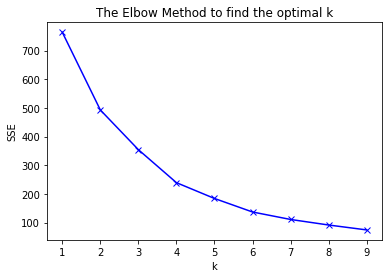

In [88]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['target']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [89]:
X = train[['target']]

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         2859.0  0.175852  0.075770  0.090647  0.113968  0.152467  0.219352   
1           43.0  2.225894  0.718569  1.457087  1.658312  2.199889  2.474449   
2        20478.0  0.005864  0.036138 -0.073027 -0.019225  0.005790  0.030205   
3          422.0  0.623094  0.218369  0.399299  0.458117  0.553933  0.713834   
4         2954.0 -0.151437  0.082818 -0.474557 -0.182446 -0.122160 -0.091543   
5          156.0 -0.798965  0.453787 -4.655420 -0.864513 -0.669597 -0.555460   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        0.398988   2859.0  6037.007695  ...   0.758902  0.995702   
1        5.262999     43.0  6037.000000  ...   0.819785  0.991599   
2        0.090554  20478.0  6037.004297  ...   0.748061  0.999529   
3        1.378095    422.0  6037.000000  ...   0.590395  0.990856   
4       -0.073033   2954.0  6037.000000  ...   0.759859  1.000000   
5       -0.476475    156.0  6037.000000  ...   0.924915  0.997408   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0                2859.0  0.175852  0.075770  0.090647  0.113968  0.152467   
1                  43.0  2.225894  0.718569  1.457087  1.658312  2.199889   
2               20478.0  0.029538  0.021630  0.000003  0.011521  0.025020   
3                 422.0  0.623094  0.218369  0.399299  0.458117  0.553933   
4                2954.0  0.151437  0.082818  0.073033  0.091543  0.122160   
5                 156.0  0.798965  0.453787  0.476475  0.555460  0.669597   

                             
              75%       max  
cluster                      
0        0.219352  0.398988  
1        2.474449  5.262999  
2        0.043948  0.090554  
3        0.713834  1.378095  
4        0.182446  0.474557  
5        0.864513  4.655420  

[6 rows x 128 columns]